In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import numpy as np

In [3]:
df = pd.read_csv('Heart Disease.csv')
df_copy = df.copy()
df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


## Exploratory Data Analysis (EDA) 

In [4]:
df.shape

(319795, 18)

In [5]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [6]:
df = df.rename(columns = {'HeartDisease':'heart_disease', 'BMI':'bmi', 'Smoking':'smoking', 'AlcoholDrinking':'alcohol_drinking', 'Stroke':'stroke', 'PhysicalHealth':'physical_health', 'MentalHealth':'mental_health', 'DiffWalking':'diff_walking', 'Sex':'sex', 'AgeCategory':'age_category', 'Race':'race', 'Diabetic':'diabetic', 'PhysicalActivity':'physical_activity', 'GenHealth':'gen_health', 'SleepTime':'sleep_time', 'Asthma':'asthma', 'KidneyDisease':'kidney_disease', 'SkinCancer':'skin_cancer'})
df.columns

Index(['heart_disease', 'bmi', 'smoking', 'alcohol_drinking', 'stroke',
       'physical_health', 'mental_health', 'diff_walking', 'sex',
       'age_category', 'race', 'diabetic', 'physical_activity', 'gen_health',
       'sleep_time', 'asthma', 'kidney_disease', 'skin_cancer'],
      dtype='object')

In [7]:
df.isnull().sum()

heart_disease        0
bmi                  0
smoking              0
alcohol_drinking     0
stroke               0
physical_health      0
mental_health        0
diff_walking         0
sex                  0
age_category         0
race                 0
diabetic             0
physical_activity    0
gen_health           0
sleep_time           0
asthma               0
kidney_disease       0
skin_cancer          0
dtype: int64

In [8]:
df['heart_disease'].value_counts()

No     292422
Yes     27373
Name: heart_disease, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   heart_disease      319795 non-null  object 
 1   bmi                319795 non-null  float64
 2   smoking            319795 non-null  object 
 3   alcohol_drinking   319795 non-null  object 
 4   stroke             319795 non-null  object 
 5   physical_health    319795 non-null  int64  
 6   mental_health      319795 non-null  int64  
 7   diff_walking       319795 non-null  object 
 8   sex                319795 non-null  object 
 9   age_category       319795 non-null  object 
 10  race               319795 non-null  object 
 11  diabetic           319795 non-null  object 
 12  physical_activity  319795 non-null  object 
 13  gen_health         319795 non-null  object 
 14  sleep_time         319795 non-null  int64  
 15  asthma             319795 non-null  object 
 16  ki

In [10]:
statical_analysis = df.describe()
statical_analysis.loc['skewness'] = df.skew()
statical_analysis.loc['kurtosis'] = df.kurt()
statical_analysis.loc['variance'] = df.var()
statical_analysis

,bmi,physical_health,mental_health,sleep_time
count,319795.000000,319795.000000,319795.000000,319795.000000
mean,28.325399,3.371710,3.898366,7.097075
std,6.356100,7.950850,7.955235,1.436007
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.340000,0.000000,0.000000,7.000000
75%,31.420000,2.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000
skewness,1.332431,2.603973,2.331112,0.679035
kurtosis,3.890043,5.528450,4.403937,7.854869


# Visualization

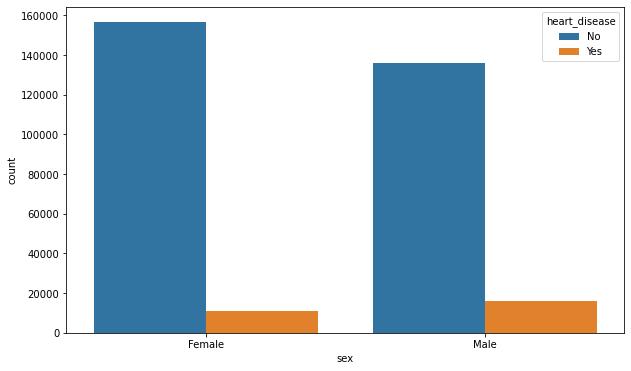

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='sex', hue='heart_disease');

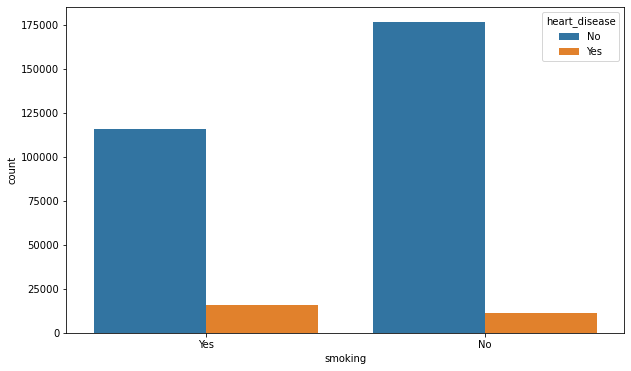

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='smoking', hue='heart_disease');

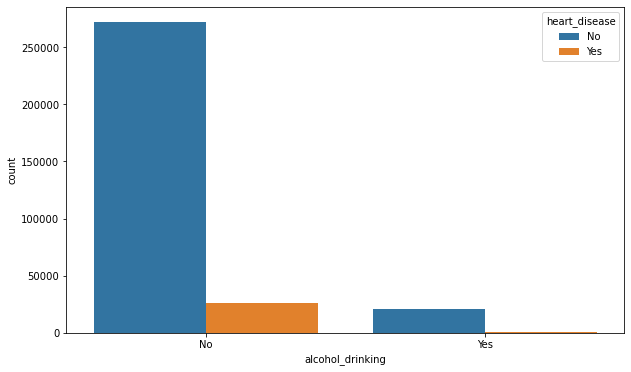

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='alcohol_drinking', hue='heart_disease');

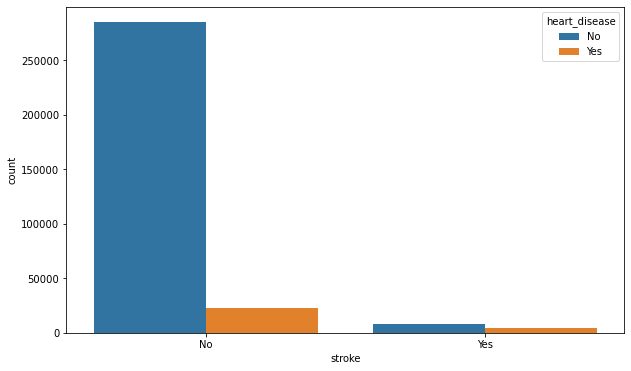

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='stroke', hue='heart_disease');

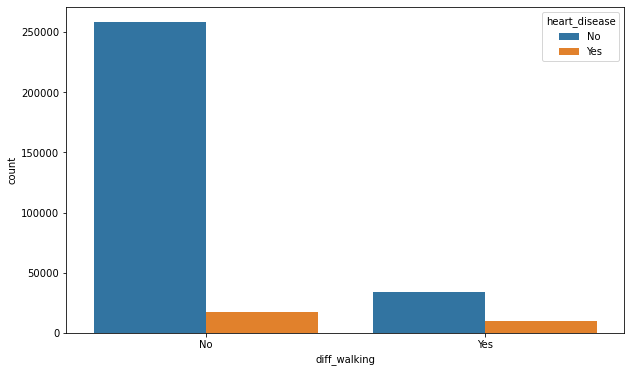

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='diff_walking', hue='heart_disease');

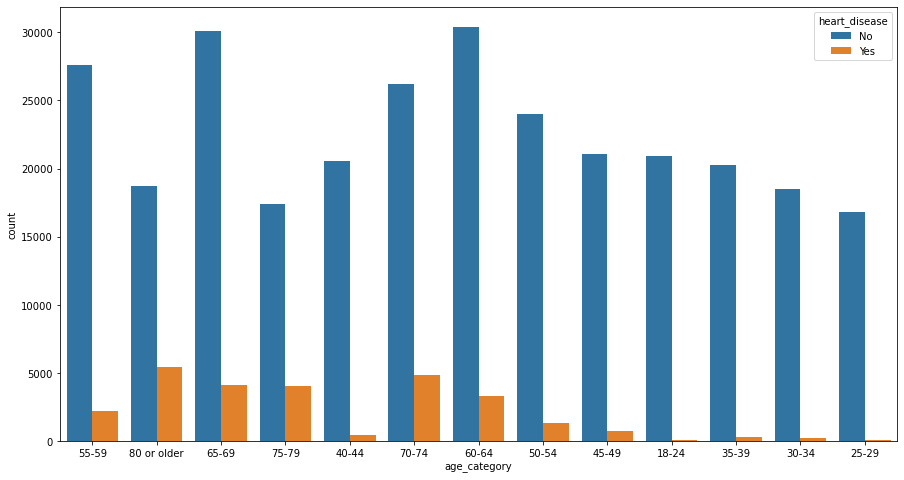

In [16]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='age_category', hue='heart_disease');

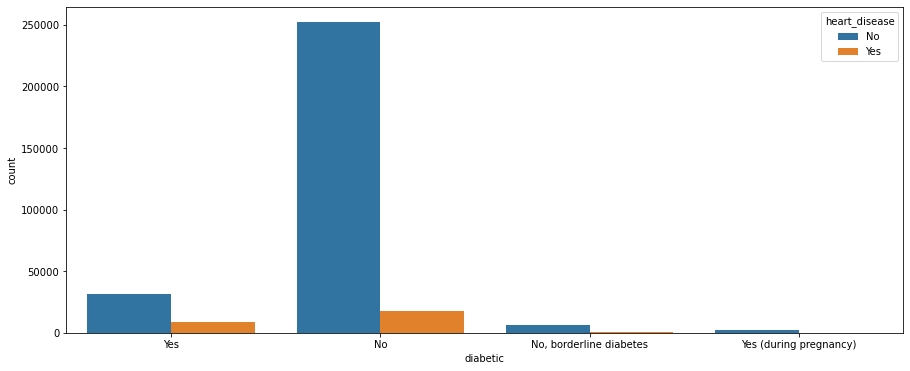

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='diabetic', hue='heart_disease');

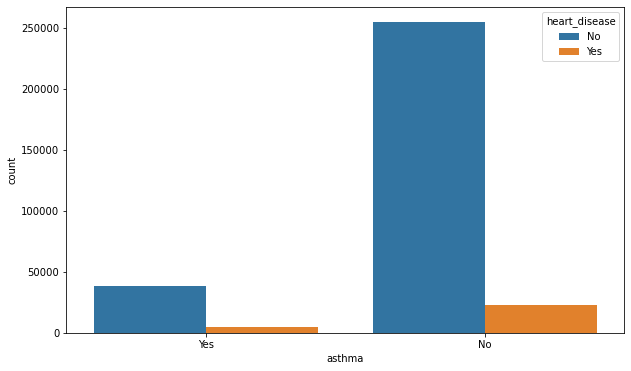

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='asthma', hue='heart_disease');

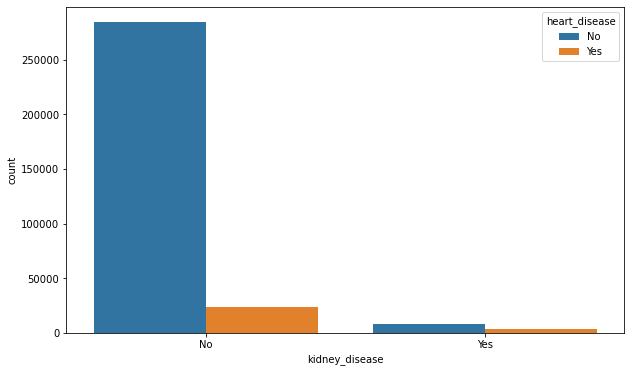

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='kidney_disease', hue='heart_disease');

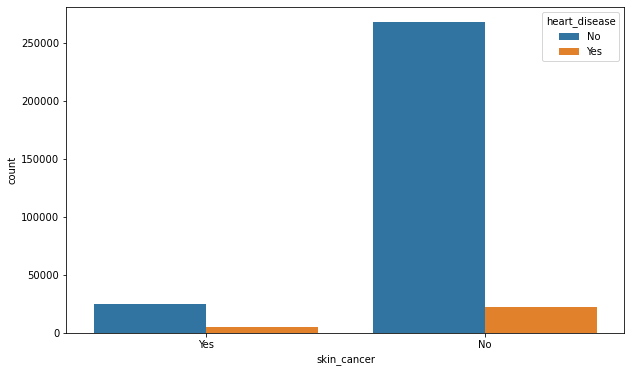

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='skin_cancer', hue='heart_disease');

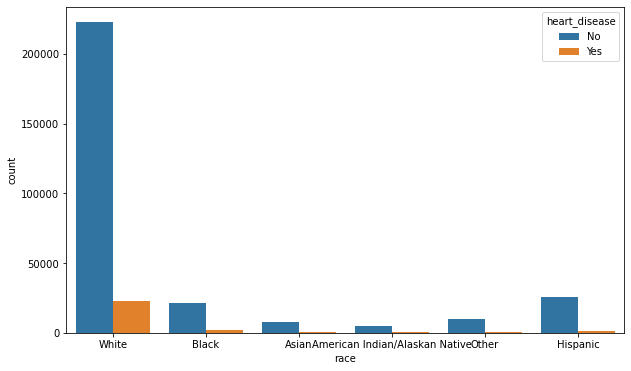

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='race', hue='heart_disease');

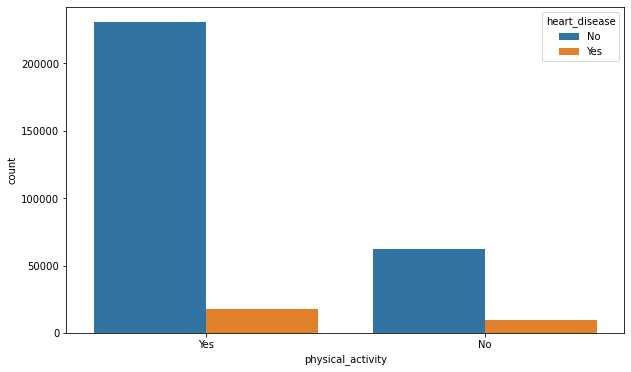

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='physical_activity', hue='heart_disease');

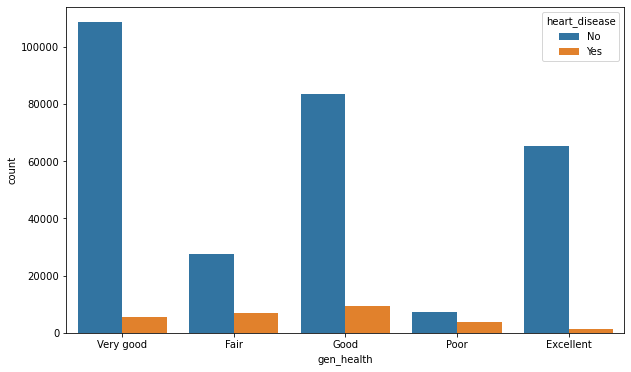

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='gen_health', hue='heart_disease');

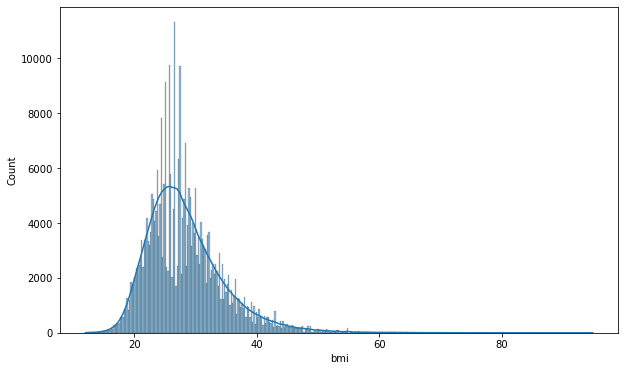

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='bmi', kde=True);

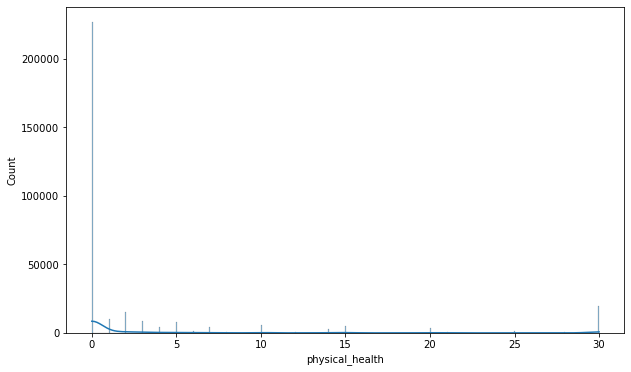

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='physical_health', kde=True);

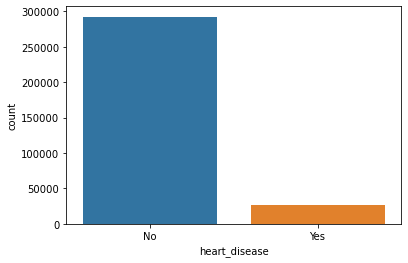

In [26]:
sns.countplot(data=df, x='heart_disease');

We can see that data is highly imbalanced

#### Checking Outliers

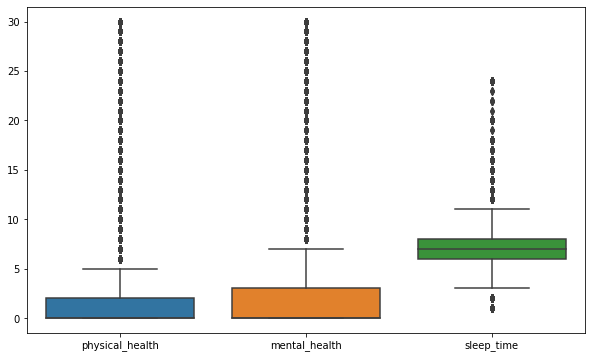

In [27]:
columns_to_plot = ['physical_health', 'mental_health', 'sleep_time']

plt.figure(figsize=(10,6))
sns.boxplot(data=df[columns_to_plot]);

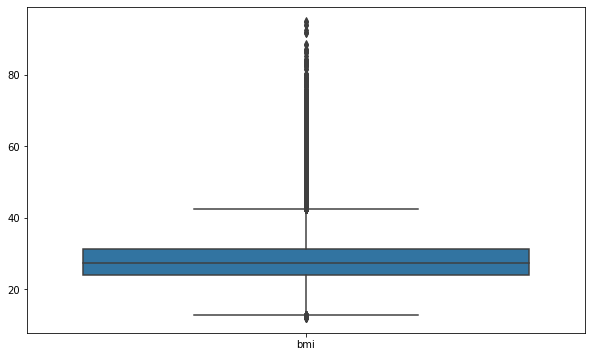

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['bmi']]);

We can see that there are outliers in these columns ('bmi', 'physical_health', 'mental_health', 'sleep_time')

#### Finding and Cleaning outliers

We can find outliers by z-score or modified z-score. if z-score < -3 or  z-score > 3, then the value is a outlier.

In [29]:
cols = ['bmi', 'physical_health', 'mental_health', 'sleep_time']
z = stats.zscore(df[cols])
z = np.abs(z)

thresold = 3
df_filtered = df[(z < thresold).all(axis = 1)]
df_outliers = df[(z > thresold).all(axis = 1)]

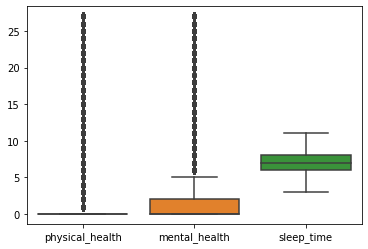

In [30]:
columns_to_plot = ['physical_health', 'mental_health', 'sleep_time']
sns.boxplot(data=df_filtered[columns_to_plot]);

In [31]:
df_outliers.count()

heart_disease        23
bmi                  23
smoking              23
alcohol_drinking     23
stroke               23
physical_health      23
mental_health        23
diff_walking         23
sex                  23
age_category         23
race                 23
diabetic             23
physical_activity    23
gen_health           23
sleep_time           23
asthma               23
kidney_disease       23
skin_cancer          23
dtype: int64

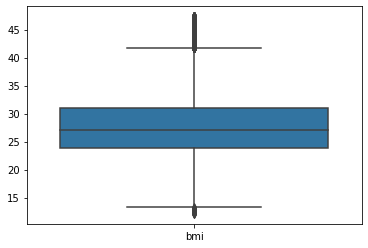

In [32]:
sns.boxplot(data=df_filtered[['bmi']]);

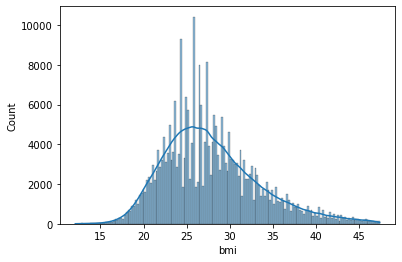

In [33]:
sns.histplot(data=df_filtered, x='bmi', kde=True);

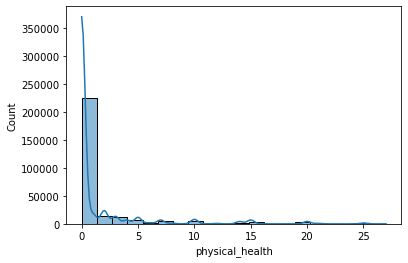

In [34]:
sns.histplot(data=df_filtered, x='physical_health', kde=True);

In [35]:
filtered_analysis = df_filtered.describe()
filtered_analysis.loc['skewness'] = df.skew()
filtered_analysis.loc['kurtosis'] = df.kurt()
filtered_analysis.loc['variance'] = df.var()
filtered_analysis

,bmi,physical_health,mental_health,sleep_time
count,280293.000000,280293.000000,280293.000000,280293.000000
mean,27.880319,1.438748,2.212064,7.111954
std,5.559384,3.850877,4.715502,1.171492
min,12.080000,0.000000,0.000000,3.000000
25%,23.910000,0.000000,0.000000,6.000000
50%,27.120000,0.000000,0.000000,7.000000
75%,31.010000,0.000000,2.000000,8.000000
max,47.370000,27.000000,27.000000,11.000000
skewness,1.332431,2.603973,2.331112,0.679035
kurtosis,3.890043,5.528450,4.403937,7.854869


In [36]:
statical_analysis = df.describe()
statical_analysis.loc['skewness'] = df.skew()
statical_analysis.loc['kurtosis'] = df.kurt()
statical_analysis.loc['variance'] = df.var()
statical_analysis

,bmi,physical_health,mental_health,sleep_time
count,319795.000000,319795.000000,319795.000000,319795.000000
mean,28.325399,3.371710,3.898366,7.097075
std,6.356100,7.950850,7.955235,1.436007
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.340000,0.000000,0.000000,7.000000
75%,31.420000,2.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000
skewness,1.332431,2.603973,2.331112,0.679035
kurtosis,3.890043,5.528450,4.403937,7.854869


In [37]:
df.shape

(319795, 18)

In [38]:
df_outliers.shape

(23, 18)

In [39]:
df_filtered.shape

(280293, 18)

In [40]:
# assign df_filtered (no outliers) as the main dataframe (df)
df = df_filtered
df_2 = df.copy()

## Correlation

Pearson correlation to see how the numeric columns are related with each other

In [41]:
df.corr(method='pearson')

,bmi,physical_health,mental_health,sleep_time
bmi,1.000000,0.071748,0.026990,-0.062066
physical_health,0.071748,1.000000,0.217057,-0.059402
mental_health,0.026990,0.217057,1.000000,-0.104951
sleep_time,-0.062066,-0.059402,-0.104951,1.000000


As we have both of numerical and categorical data in out dataset, that's why we can use the Cramér's V statistic or Theil’s U statistic. These statistics can measure the association between categorical variables.

# Emcoding

In [42]:
# checking unique values of the categorical columns:
from pandas.core.dtypes.common import is_numeric_dtype
for col in df_copy.columns:
    if is_numeric_dtype(df_copy[col]):
        continue
    else:
        unique = df_copy[col].unique()
        print(col, " : ", unique)

HeartDisease  :  ['No' 'Yes']
Smoking  :  ['Yes' 'No']
AlcoholDrinking  :  ['No' 'Yes']
Stroke  :  ['No' 'Yes']
DiffWalking  :  ['No' 'Yes']
Sex  :  ['Female' 'Male']
AgeCategory  :  ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race  :  ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic  :  ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity  :  ['Yes' 'No']
GenHealth  :  ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma  :  ['Yes' 'No']
KidneyDisease  :  ['No' 'Yes']
SkinCancer  :  ['Yes' 'No']


In [43]:
col_bool = ['heart_disease','smoking','alcohol_drinking','stroke','diff_walking','physical_activity','asthma','kidney_disease','skin_cancer']
col_ordinal = ['gen_health']
col_categorical = ['sex', 'age_category', 'race', 'diabetic']

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

from pandas.core.dtypes.common import is_numeric_dtype

# Label Encoding the Boolean Columns:
le  = LabelEncoder()

for col in col_bool:
    if is_numeric_dtype(df[col]):
        continue
    else:
        df[col] = le.fit_transform(df[col])
        
# Ornal Encoding the ordinal column:
order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
ordinal_encoder = OrdinalEncoder(categories=[order])
df['gen_health'] = ordinal_encoder.fit_transform(df[['gen_health']])

# OneHot Encoding for the other columns contain more than two non-ordinal categories
one_hot_encoder = OneHotEncoder()

for col in col_categorical:
    dummy_col = pd.get_dummies(df[col], prefix=col)
    df.drop(col, axis=1, inplace=True)
    df = pd.concat([df, dummy_col], axis=1)

In [44]:
pd.set_option('display.max_columns', None)
df.head()

,heart_disease,bmi,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer,sex_Female,sex_Male,age_category_18-24,age_category_25-29,age_category_30-34,age_category_35-39,age_category_40-44,age_category_45-49,age_category_50-54,age_category_55-59,age_category_60-64,age_category_65-69,age_category_70-74,age_category_75-79,age_category_80 or older,race_American Indian/Alaskan Native,race_Asian,race_Black,race_Hispanic,race_Other,race_White,diabetic_No,"diabetic_No, borderline diabetes",diabetic_Yes,diabetic_Yes (during pregnancy)
1,0,20.34,0,0,1,0,0,0,1,3.0,7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
3,0,24.21,0,0,0,0,0,0,0,2.0,6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
6,0,21.63,0,0,0,15,0,0,1,1.0,4,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
7,0,31.64,1,0,0,5,0,1,0,2.0,9,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
8,0,26.45,0,0,0,0,0,0,0,1.0,5,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [45]:
df.columns

Index(['heart_disease', 'bmi', 'smoking', 'alcohol_drinking', 'stroke',
       'physical_health', 'mental_health', 'diff_walking', 'physical_activity',
       'gen_health', 'sleep_time', 'asthma', 'kidney_disease', 'skin_cancer',
       'sex_Female', 'sex_Male', 'age_category_18-24', 'age_category_25-29',
       'age_category_30-34', 'age_category_35-39', 'age_category_40-44',
       'age_category_45-49', 'age_category_50-54', 'age_category_55-59',
       'age_category_60-64', 'age_category_65-69', 'age_category_70-74',
       'age_category_75-79', 'age_category_80 or older',
       'race_American Indian/Alaskan Native', 'race_Asian', 'race_Black',
       'race_Hispanic', 'race_Other', 'race_White', 'diabetic_No',
       'diabetic_No, borderline diabetes', 'diabetic_Yes',
       'diabetic_Yes (during pregnancy)'],
      dtype='object')

# Spliting Features and Labels

In [46]:
x = df.drop('heart_disease', axis=1)
y = df[['heart_disease']]

In [47]:
x.shape

(280293, 38)

In [48]:
x.head()

,bmi,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer,sex_Female,sex_Male,age_category_18-24,age_category_25-29,age_category_30-34,age_category_35-39,age_category_40-44,age_category_45-49,age_category_50-54,age_category_55-59,age_category_60-64,age_category_65-69,age_category_70-74,age_category_75-79,age_category_80 or older,race_American Indian/Alaskan Native,race_Asian,race_Black,race_Hispanic,race_Other,race_White,diabetic_No,"diabetic_No, borderline diabetes",diabetic_Yes,diabetic_Yes (during pregnancy)
1,20.34,0,0,1,0,0,0,1,3.0,7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
3,24.21,0,0,0,0,0,0,0,2.0,6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
6,21.63,0,0,0,15,0,0,1,1.0,4,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
7,31.64,1,0,0,5,0,1,0,2.0,9,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
8,26.45,0,0,0,0,0,0,0,1.0,5,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [49]:
y.shape

(280293, 1)

In [50]:
y.head()

,heart_disease
1,0
3,0
6,0
7,0
8,0


# Feature Scaling 

In [51]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

cols_to_be_scaling = ['bmi', 'physical_health', 'mental_health', 'gen_health', 'sleep_time']

for col in cols_to_be_scaling:
    if is_numeric_dtype(x[col]):
        x[col] = std_scaler.fit_transform(x[[col]])

In [52]:
x.head()

,bmi,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer,sex_Female,sex_Male,age_category_18-24,age_category_25-29,age_category_30-34,age_category_35-39,age_category_40-44,age_category_45-49,age_category_50-54,age_category_55-59,age_category_60-64,age_category_65-69,age_category_70-74,age_category_75-79,age_category_80 or older,race_American Indian/Alaskan Native,race_Asian,race_Black,race_Hispanic,race_Other,race_White,diabetic_No,"diabetic_No, borderline diabetes",diabetic_Yes,diabetic_Yes (during pregnancy)
1,-1.356325,0,0,1,-0.373616,-0.469105,0,1,0.281693,-0.095566,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
3,-0.660204,0,0,0,-0.373616,-0.469105,0,0,-0.781838,-0.949180,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
6,-1.124285,0,0,0,3.521607,-0.469105,0,1,-1.845368,-2.656407,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
7,0.676278,1,0,0,0.924791,-0.469105,1,0,-0.781838,1.611662,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
8,-0.257281,0,0,0,-0.373616,-0.469105,0,0,-1.845368,-1.802794,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [53]:
df_2.head()

,heart_disease,bmi,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
6,No,21.63,No,No,No,15,0,No,Female,70-74,White,No,Yes,Fair,4,Yes,No,Yes
7,No,31.64,Yes,No,No,5,0,Yes,Female,80 or older,White,Yes,No,Good,9,Yes,No,No
8,No,26.45,No,No,No,0,0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5,No,Yes,No


# Balancing Imbalanced Data

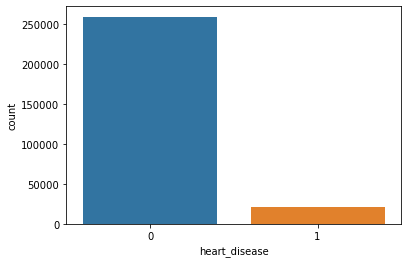

In [54]:
sns.countplot(data=df, x='heart_disease');

As we see out data is highly imbalanced, we need to balance our data.

### Under Sampling

In [55]:
from imblearn.under_sampling import NearMiss
n_miss = NearMiss()

X_new1, y_new1 = n_miss.fit_resample(x,y)

In [56]:
X_new1.shape

(41346, 38)

In [57]:
y_new1.shape

(41346, 1)

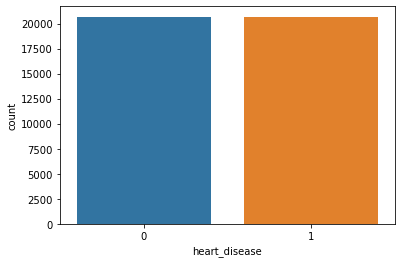

In [58]:
sns.countplot(data=y_new1, x='heart_disease');

In [59]:
y_new1['heart_disease'].value_counts()

0    20673
1    20673
Name: heart_disease, dtype: int64

### Over Sampling

In [60]:
from imblearn.over_sampling import RandomOverSampler
over_sm = RandomOverSampler(random_state=42)

X_new2, y_new2 = over_sm.fit_resample(x, y)

In [61]:
X_new2.shape

(519240, 38)

In [62]:
y_new2.shape

(519240, 1)

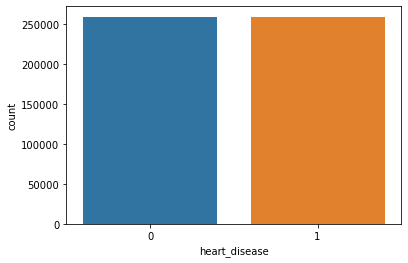

In [63]:
sns.countplot(data = y_new2, x = 'heart_disease');

In [64]:
y_new2['heart_disease'].value_counts()

0    259620
1    259620
Name: heart_disease, dtype: int64

### Synthetic Minority Oversampling Tenique (SMOTETomek)

In [65]:
# from imblearn.combine import SMOTETomek
# sm = SMOTETomek(random_state=42)

# X_new, y_new = sm.fit_resample(x,y)

# Feature Importance

In [66]:
from sklearn.ensemble import ExtraTreesClassifier
extra_clf = ExtraTreesClassifier()
extra_clf.fit(X_new2, y_new2)
feature_importance = extra_clf.feature_importances_
feature_importance

array([0.26493487, 0.0237017 , 0.01027615, 0.02518686, 0.06090926,
       0.0597755 , 0.03000781, 0.02111076, 0.08855591, 0.09360696,
       0.01693287, 0.0120612 , 0.01498842, 0.01254151, 0.01181965,
       0.01287783, 0.00990838, 0.00931911, 0.01132614, 0.00897579,
       0.00730876, 0.00610537, 0.00659558, 0.00853929, 0.01260015,
       0.01955658, 0.02130779, 0.03756387, 0.0032275 , 0.00296834,
       0.00628616, 0.00627202, 0.00429858, 0.00942007, 0.01944405,
       0.0023394 , 0.02632253, 0.00102726])

In [68]:
imp = pd.DataFrame(feature_importance, columns = ['gain_score'])

cols = pd.DataFrame(X_new2.columns, columns = ['feature_names'])

gains = pd.concat([cols, imp], axis=1)

gains.nlargest(gains.shape[0], 'gain_score')

,feature_names,gain_score
0,bmi,0.264935
9,sleep_time,0.093607
8,gen_health,0.088556
4,physical_health,0.060909
5,mental_health,0.059776
27,age_category_80 or older,0.037564
6,diff_walking,0.030008
36,diabetic_Yes,0.026323
3,stroke,0.025187
1,smoking,0.023702


In [71]:
gains.nlargest(20, 'gain_score')

,feature_names,gain_score
0,bmi,0.264935
9,sleep_time,0.093607
8,gen_health,0.088556
4,physical_health,0.060909
5,mental_health,0.059776
27,age_category_80 or older,0.037564
6,diff_walking,0.030008
36,diabetic_Yes,0.026323
3,stroke,0.025187
1,smoking,0.023702


SMOTETomek takes too many time. Waited more than 1 hour. That's why I have skipped this method

# Machine Learning Models

## Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

from sklearn.model_selection import train_test_split

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, plot_roc_curve

#### With Not sampled data

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state= 42, train_size=0.7)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
y_pred = dt_clf.predict(X_test)

In [76]:
accuracy_score(y_test, y_pred)

0.8791979830653601

#### With Under Sampled Data

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_new1,y_new1, random_state= 42, train_size=0.7)

dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.8531925185424056

#### Over_Sampled Data

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_new2,y_new2, random_state= 42, train_size=0.7)

In [79]:
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9554027681483194

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     77718
           1       0.92      1.00      0.96     78054

    accuracy                           0.96    155772
   macro avg       0.96      0.96      0.96    155772
weighted avg       0.96      0.96      0.96    155772



In [81]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).reshape(-1)

In [82]:
print('TP = {} \nFN = {} \nFP = {} \nTN = {}'.format(tp, fn, fp, tn))

TP = 70800 
FN = 6918 
FP = 29 
TN = 78025


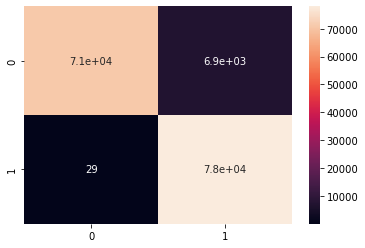

In [83]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

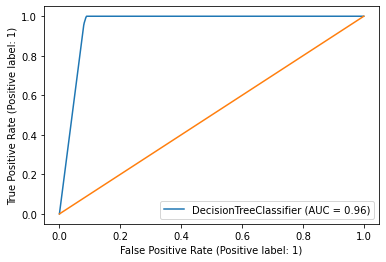

In [84]:
plot_roc_curve(dt_clf, X_test, y_test);
plt.plot([0,1], [0,1]);

# Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [86]:
y_pred = rf_clf.predict(X_test)

In [87]:
rf_clf.score(X_test, y_test)

0.966701332717048

#### Hyper parameter tuning

In [88]:
import numpy as np
trees = np.random.randint(15, 150, 30)
max_featrues = ['sqrt', 'log2']
max_depth = np.random.randint(2,15, 50)
criteroin = ['gini', 'entropy']
min_samples_split = [2,3,4]

grids = {
    'n_estimators': trees,
    'max_features': max_featrues,
    'max_depth': max_depth,
    'criterion': criteroin,
    'min_samples_split': min_samples_split
}
print(grids)

{'n_estimators': array([ 88,  44, 102,  28, 108,  40, 139,  65,  78,  41, 133, 136,  99,
        24, 148, 123,  64,  45, 137,  93,  57,  53,  49,  92,  81,  97,
        91,  71,  61, 143]), 'max_features': ['sqrt', 'log2'], 'max_depth': array([10,  3,  7, 11,  2,  3, 12, 14, 14,  5, 13, 12,  7, 10,  8,  3,  8,
        3,  2,  6,  5,  5,  4,  6, 12, 13,  9,  3,  9, 14,  2,  8,  7, 13,
       10, 11,  5,  4, 11,  7, 14,  2,  7,  6,  9,  2,  5,  7, 14,  4]), 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 3, 4]}


In [90]:
from sklearn.model_selection import RandomizedSearchCV

In [93]:
rcv = RandomizedSearchCV(rf_clf, grids, n_iter=10 , cv=3)

In [94]:
rcv.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([10,  3,  7, 11,  2,  3, 12, 14, 14,  5, 13, 12,  7, 10,  8,  3,  8,
        3,  2,  6,  5,  5,  4,  6, 12, 13,  9,  3,  9, 14,  2,  8,  7, 13,
       10, 11,  5,  4, 11,  7, 14,  2,  7,  6,  9,  2,  5,  7, 14,  4]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': array([ 88,  44, 102,  28, 108,  40, 139,  65,  78,  41, 133, 136,  99,
        24, 148, 123,  64,  45, 137,  93,  57,  53,  49,  92,  81,  97,
        91,  71,  61, 143])})

In [95]:
rcv.score(X_test, y_test)

0.7870348971573838

# AdaBoost

In [96]:
from sklearn.ensemble import AdaBoostClassifier

In [97]:
ada_clf = AdaBoostClassifier(learning_rate= 0.1)
ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

0.7364802403512827

# XgBoost

In [98]:
import xgboost as xgb

In [99]:
xgb_clf = xgb.XGBClassifier()

In [100]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [101]:
xgb_clf.score(X_test, y_test)

0.7873302005495211

# Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)

LogisticRegression()

In [103]:
lr_clf.score(X_test, y_test)

0.7630511260046735

# SVC

In [ ]:
# from sklearn.svm import SVC

# svc = SVC()
# svc.fit(X_train, y_train)
# svc.score(X_test, y_test)

   # KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn.score(X_test, y_test)

# Neural Network

In [ ]:
X_train.shape

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

# Modeling
model = Sequential([
    Dense(128, input_dim=38, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.01),
              loss = keras.losses.BinaryCrossentropy(), metrics = ['accuracy']
             )

# Fitting with no early stopping or callback
# history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64, validation_data=(X_test, y_test))

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
 def on_epoch_end(self, epoch, logs={}):
   if(logs.get('accuracy')>0.99):
     print("\nReached 99% accuracy so cancelling training!")
     self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(X_train, y_train, verbose=1, epochs=500, batch_size=64, 
                    validation_data=(X_test, y_test), callbacks=[callbacks])